In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%load_ext rpy2.ipython

In [1]:
.libPaths(c("/content/drive/MyDrive/Colab Notebooks/R_lib", .libPaths()))
library(dplyr)
library(pheatmap)
library(RColorBrewer)
library(limma)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
metadata = read.csv("metadata_GSE60427.csv")
exp_scaled = read.csv("exp_GSE60427.csv")

In [5]:
unique(metadata$condition)

selected_metadata2 = metadata[metadata$condition %in% c("H.P_Infection", "Control"), ]
dim(selected_metadata2)
selected_columns2 = colnames(exp_scaled)[colnames(exp_scaled) %in% selected_metadata2$ID]

# Select only those columns from 'data_scaled'
filtered_data_scaled2 = exp_scaled[, selected_columns2]
dim(filtered_data_scaled2)     # 28872    16

[1] "Control"       "H.P_Infection" "H.P_Gastritis" "IM"

[1] 16  4

[1] 28872    16

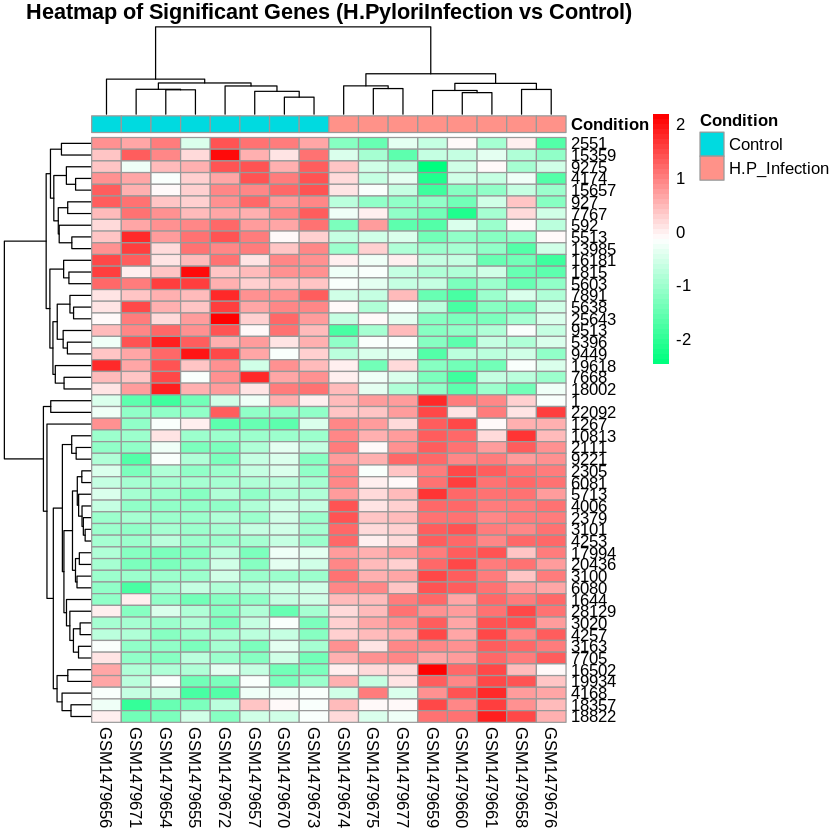

In [10]:
# Define thresholds for classification
logFC_threshold <- 1
adjPval_threshold <- 0.05

# Create the sample annotation using the filtered metadata
sample_annotation <- data.frame(Condition = filtered_metadata$condition)

# Generate the heatmap
pheatmap(
  scaled_exp,                          # Use all selected genes
  annotation_col = sample_annotation,  # Add sample annotation
  cluster_rows = TRUE,                 # Cluster genes
  cluster_cols = TRUE,                 # Cluster samples
  show_rownames = TRUE,                # Show gene names
  show_colnames = TRUE,                # Show sample names
  color = colorRampPalette(c("springgreen", "white", "red"))(50),  # Color gradient
  main = "Heatmap of Significant Genes (H.PyloriInfection vs Control)"
)